In [1]:
import sys

In [2]:
sys.executable

'/Users/xingwenzhang/work/anaconda3/bin/python'

In [1]:
import numpy as np

In [3]:
correct_out = np.array([[0.70157129, 0.83483484, 0.96809839, 1.10136194],
                        [1.86723094, 2.02561647, 2.18400199, 2.34238752],
                        [3.0328906,  3.2163981,  3.3999056,  3.5834131]])
print(correct_out.shape)

(3, 4)


In [5]:
a=np.ones((3,3))

In [6]:
a

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [7]:
b=a+1

In [8]:
b

array([[ 2.,  2.,  2.],
       [ 2.,  2.,  2.],
       [ 2.,  2.,  2.]])

In [15]:
np.sum(b,axis=1)

array([ 6.,  6.,  6.])

In [16]:
a=np.random.rand(2,3)

In [17]:
a

array([[ 0.50243407,  0.01789284,  0.74190709],
       [ 0.0064947 ,  0.04649865,  0.51009586]])

In [18]:
np.sum(a,axis=0)

array([ 0.50892877,  0.06439149,  1.25200295])

In [19]:
np.sum(a,axis=1)

array([ 1.26223399,  0.56308921])

In [3]:
a=np.array([1,2,3])
b=np.ones((5,3))

In [6]:
a.shape

(3,)

In [7]:
b.shape

(5, 3)

In [10]:
(b/a).shape

(5, 3)

In [11]:
a/2

array([ 0.5,  1. ,  1.5])

In [12]:
a=np.array([1,2,3,4,5])

In [14]:
b/(a.reshape(5,1))

array([[ 1.        ,  1.        ,  1.        ],
       [ 0.5       ,  0.5       ,  0.5       ],
       [ 0.33333333,  0.33333333,  0.33333333],
       [ 0.25      ,  0.25      ,  0.25      ],
       [ 0.2       ,  0.2       ,  0.2       ]])

In [16]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

FLAGS = None


def main(_):
  # Import data
  mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

  # Create the model
  x = tf.placeholder(tf.float32, [None, 784])
  W = tf.Variable(tf.zeros([784, 10]))
  b = tf.Variable(tf.zeros([10]))
  y = tf.matmul(x, W) + b

  # Define loss and optimizer
  y_ = tf.placeholder(tf.float32, [None, 10])

  # The raw formulation of cross-entropy,
  #
  #   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
  #                                 reduction_indices=[1]))
  #
  # can be numerically unstable.
  #
  # So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
  # outputs of 'y', and then average across the batch.
  cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
  train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

  sess = tf.InteractiveSession()
  tf.global_variables_initializer().run()
  # Train
  for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    print("batch_xs")
    print(batch_xs.shape)
    print(batch_xs)
    print("batch_ys")
    print(batch_ys.shape)
    print(batch_ys)
    break
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

  # Test trained model
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  parser.add_argument('--data_dir', type=str, default='/tmp/tensorflow/mnist/input_data',
                      help='Directory for storing input data')
  FLAGS, unparsed = parser.parse_known_args()
  tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)

Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
batch_xs
(100, 784)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
batch_ys
(100, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0. 

SystemExit: 

/Users/xingwenzhang/work/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
test={}
test[1]='a'
test[2]='b'
for n, v in test.items():
    print (n, v)

1 a
2 b


In [18]:
list(test.items())

[(1, 'a'), (2, 'b')]

In [19]:
test.items()

dict_items([(1, 'a'), (2, 'b')])

In [20]:
test.keys()

dict_keys([1, 2])

In [21]:
test.values()

dict_values(['a', 'b'])

In [1]:
import numpy as np

In [2]:
np.zeros((3,2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [3]:
np.zeros([3,2])

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [1]:
import numpy as np

In [9]:
np.random.binomial(10, 0.9, (4,5))

array([[ 9,  8,  7, 10, 10],
       [ 7,  9,  8,  8, 10],
       [ 9,  9, 10,  9, 10],
       [ 9, 10, 10,  8, 10]])

In [10]:
max(2,1)

2

In [11]:
np.max(2,1)

AxisError: axis 1 is out of bounds for array of dimension 0

In [13]:
x = np.ones((3,2))

In [17]:
np.maximum(0,x)

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [19]:
x= np.array([[1,2,3],[0,1,0]])

In [20]:
x

array([[1, 2, 3],
       [0, 1, 0]])

In [22]:
np.where(x>0, 0.1*x, 0)

array([[ 0.1,  0.2,  0.3],
       [ 0. ,  0.1,  0. ]])

In [23]:
x


array([[1, 2, 3],
       [0, 1, 0]])

In [26]:
x[1:]

array([[0, 1, 0]])

In [27]:
import matplotlib.pyplot as plt

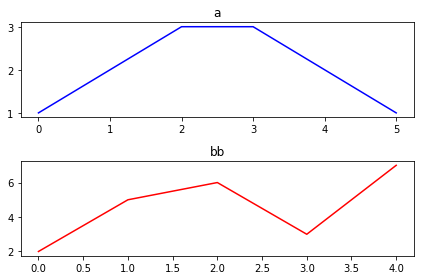

In [38]:
a=[1,2,3,3,2,1]
b=[2,5,6,3,7]
# plt.figure(1)
plt.subplot(2,1,1)
plt.plot(a,'b',label="a")
plt.title("a")
# plt.figure(2)
plt.subplot(2,1,2)
plt.plot(b,'r',label="b")
plt.title("bb")
plt.tight_layout()
plt.show()